In [24]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 849.7 kB/s eta 0:00:00a 0:00:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [25]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import graphviz
plt.style.use('fivethirtyeight')

In [17]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

In [4]:
np.random.seed(45)
N_SAMPLES = 5000

In [6]:
alpha = 1.12
beta = 0.93
epsilon = np.random.randn(N_SAMPLES)

In [11]:
X = np.random.randn(N_SAMPLES)
y = alpha + beta * X + 0.5 * epsilon

In [13]:
X = sm.add_constant(X)

In [14]:
model = sm.OLS(y, X)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:25:11   Log-Likelihood:                -3615.6
No. Observations:                5000   AIC:                             7235.
Df Residuals:                    4998   BIC:                             7248.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1244      0.007    159.403      0.0

In [15]:
# Generate predictions
y_pred = fitted_model.predict(X)

<Figure size 800x600 with 0 Axes>

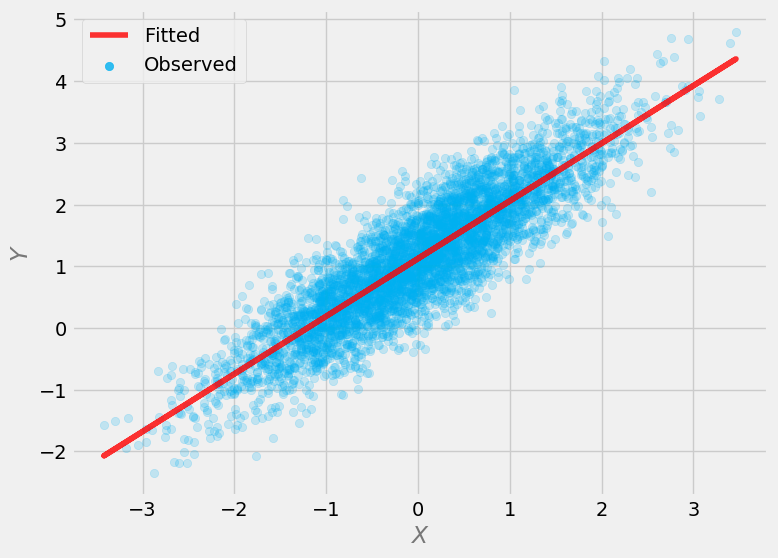

In [18]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(X[:, 1], y_pred, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$X$', alpha=.5)
plt.ylabel('$Y$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
[l.set_alpha(.8) for l in legend.legendHandles]

plt.show()

In [19]:
# Let's remove the constant (now X becomes our target variable) 
x_rev = X[:, 1]

# Let's add constant (now Y becomes our predictor)
Y_rev = sm.add_constant(y)

In [20]:
# Instantiate the model and fit it
model_rev = sm.OLS(x_rev, Y_rev)
fitted_model_rev = model_rev.fit()

# Print results summary
print(fitted_model_rev.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                 1.759e+04
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        10:31:31   Log-Likelihood:                -3332.0
No. Observations:                5000   AIC:                             6668.
Df Residuals:                    4998   BIC:                             6681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9368      0.010    -96.279      0.0

In [21]:
# Generate predictions
x_pred_rev = fitted_model_rev.predict(Y_rev)

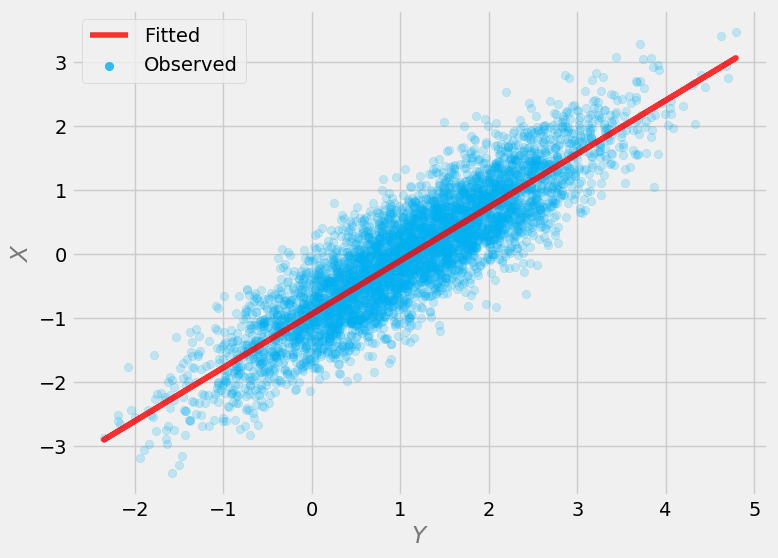

In [22]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_rev[:, 1], x_rev, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(Y_rev[:, 1], x_pred_rev, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$Y$', alpha=.5)
plt.ylabel('$X$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
[l.set_alpha(.8) for l in legend.legendHandles]

plt.show()

### Structual Causal Model

In [29]:
np.random.seed(45)

# Define the sample size
N_SAMPLES = 1000

# Build the graph (note that the coefficients are arbitrarily chosen)
a = np.random.randn(N_SAMPLES)
x = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
y = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
b = 1.5 * x + 0.75 * y

In [30]:
# Define four model variants
variants = [
    [x],
    [x, a],
    [x, b],
    [x, a, b]
]

# Fit models iteratively and store the results
results = []
for variant in variants:
    X = sm.add_constant(np.stack(variant).T)
    
    # Instantiate the model and fit it
    model = sm.OLS(y, X)
    fitted_model = model.fit()
    
    results.append((fitted_model.params, fitted_model.pvalues))
    
    print(f'Params: {fitted_model.params.round(3)}')
    print(f'p-vals: {fitted_model.pvalues.round(3)}')
    print(f'Signif: {fitted_model.pvalues <= .05}\n')


Params: [-0.02   0.947]
p-vals: [0.359 0.   ]
Signif: [False  True]

Params: [-0.011  0.014  1.967]
p-vals: [0.488 0.657 0.   ]
Signif: [False False  True]

Params: [-0.    -2.     1.333]
p-vals: [0.019 0.    0.   ]
Signif: [ True  True  True]

Params: [ 0.    -2.     0.     1.333]
p-vals: [0.211 0.    0.001 0.   ]
Signif: [False  True  True  True]

